### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [197]:
data = pd.read_csv('data/coupons.csv')

In [198]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

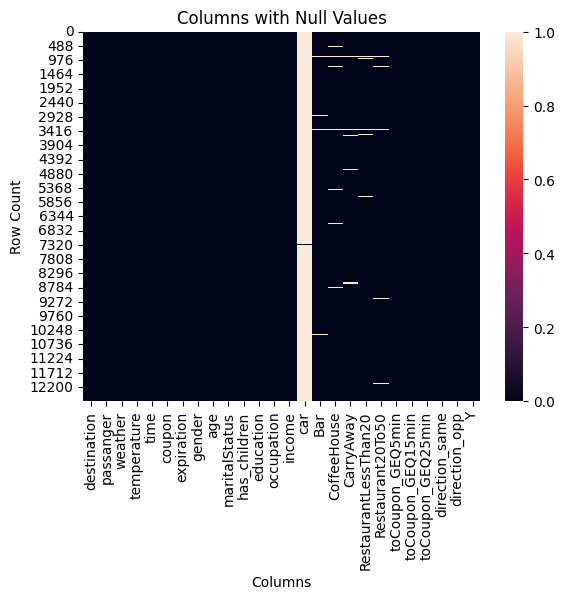

In [199]:
df = pd.DataFrame(data)
sns.heatmap(df.isna(), cbar=True)
plt.xlabel('Columns')
plt.ylabel('Row Count')
plt.title("Columns with Null Values")
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [201]:
print("Total Row Count: " + str(df.shape[0]))
df = df.drop_duplicates(keep='first')
print("Total Rows After Removing Duplicates: " + str(df.shape[0]))
print("Around 74 duplicates were removed")

# Check for missing values
print("Missing values:\n", df.isna().mean().multiply(100).round(2))
print("Over 99% of Car Data is missing making it not fit for data analysis")

# Check data types
print("\nData types:\n", df.dtypes)

# Replace non-numeric age values and convert to numeric
df['age'] = df['age'].replace({'50plus': 51, 'below21': 20})
df['age'] = pd.to_numeric(df['age'])

# check age unique
df['age'].unique()

# Define the categorization function
def categorize_age(age):
   if age < 21:
     return 'below 21'
   elif 21 <= age <= 25:
     return '21 to 25'
   elif 26 <= age <= 30:
     return '26 to 30'
   elif 31 <= age <= 40:
     return '31 to 40'
   elif 41 <= age <= 50:
     return '41 to 50'
   elif age > 50:
     return '50 plus'
   else:
     return '25plus'

# Apply the function to create the new column
df['age_category'] = df['age'].apply(categorize_age)


# check age unique
df['age_category'].unique()

Total Row Count: 12610
Total Rows After Removing Duplicates: 12610
Around 74 duplicates were removed
Missing values:
 destination              0.00
passanger                0.00
weather                  0.00
temperature              0.00
time                     0.00
coupon                   0.00
expiration               0.00
gender                   0.00
age                      0.00
maritalStatus            0.00
has_children             0.00
education                0.00
occupation               0.00
income                   0.00
car                     99.14
Bar                      0.85
CoffeeHouse              1.72
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.50
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Y                        0.00
age_category             0.00
dtype: float64
Over 99% of Car Data is missing making it not fit for dat

array(['21 to 25', '41 to 50', '26 to 30', '31 to 40', '50 plus',
       'below 21'], dtype=object)

4. What proportion of the total observations chose to accept the coupon?



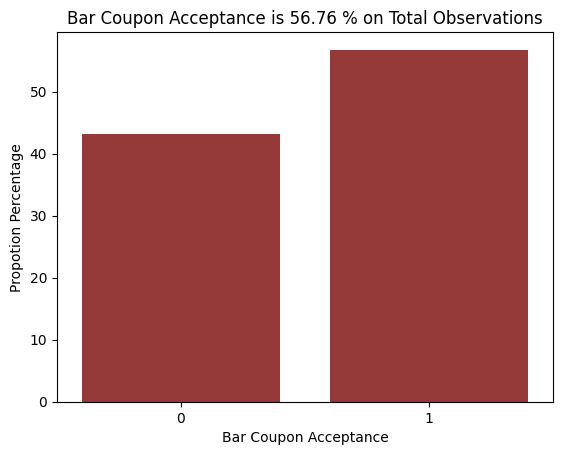

In [202]:
#For proportion of the total observations chose to accept the coupon
sns.barplot(df['Y'].value_counts(normalize=True)*100,  color = "brown")

# Add a title
plt.xlabel('Bar Coupon Acceptance')
plt.ylabel('Propotion Percentage')
plt.title('Bar Coupon Acceptance is 56.76 % on Total Observations')

# Show the plot
plt.show()


5. Use a bar plot to visualize the `coupon` column.

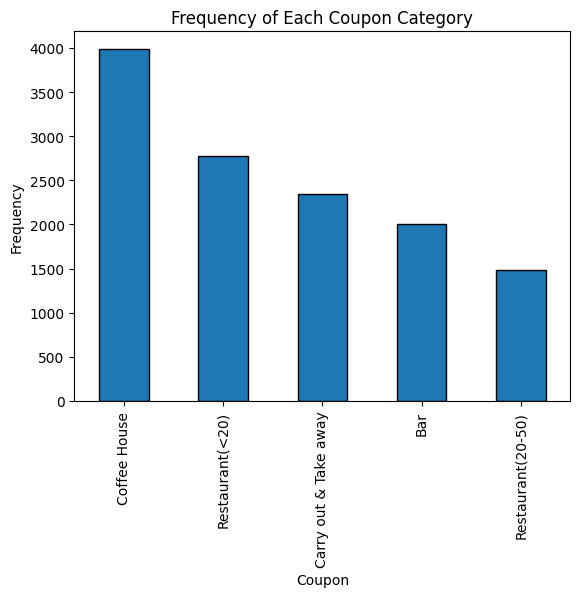

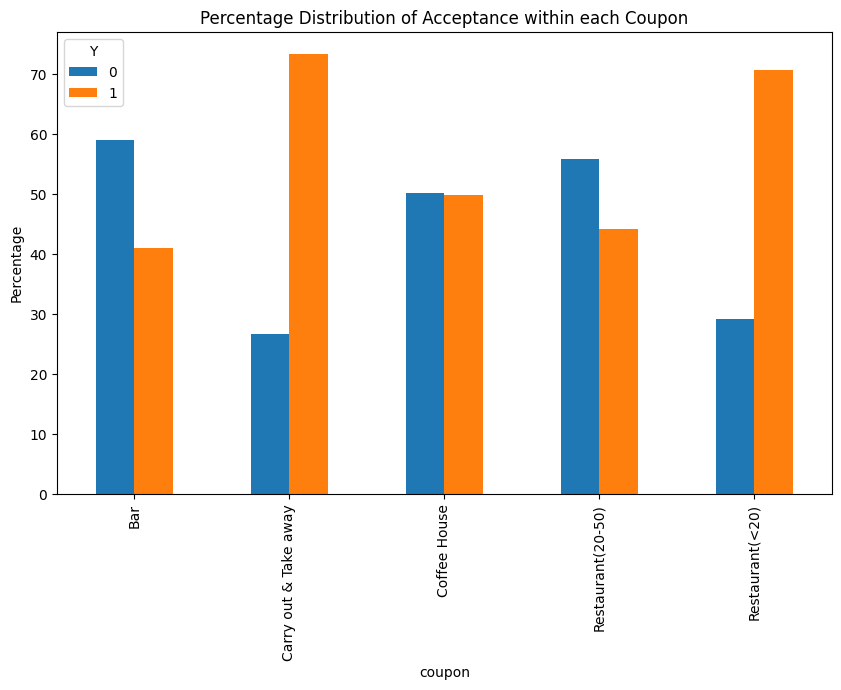

In [203]:
#visualize Coupon Column against its Frequency
df['coupon'].value_counts().plot(kind='bar', edgecolor='black')
plt.xlabel('Coupon')
plt.ylabel('Frequency')
plt.title('Frequency of Each Coupon Category')
plt.show()


#visualize Coupon Column against its acceptance
df.groupby('coupon')["Y"].value_counts(normalize=True).unstack().multiply(100).plot(kind='bar', figsize=(10, 6))
# Add a title
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Acceptance within each Coupon')
plt.show()


6. Use a histogram to visualize the temperature column.


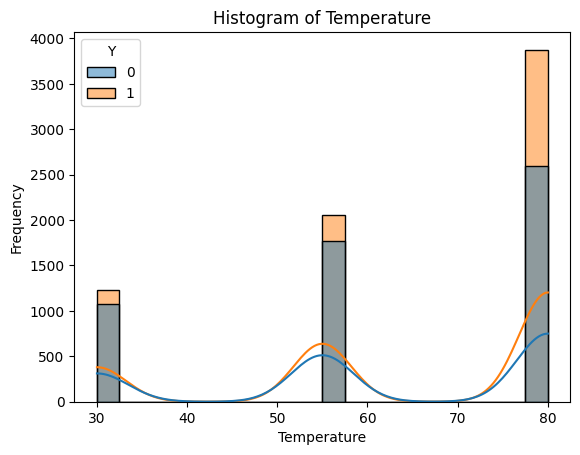

In [204]:
# df.hist(column = 'temperature', grid = False, color = "brown" , figsize= (8,4))



sns.histplot(data=df, x='temperature', hue='Y', bins=20, kde=True)



plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [205]:
# df = pd.read_csv('data/coupons.csv')
df_bar = df[df["coupon"] == 'Bar']
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,age_category
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,21 to 25
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,1,0,1,21 to 25
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,1,0,1,0,21 to 25
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,21 to 25
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,21 to 25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,26 to 30
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,26 to 30
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,26 to 30
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,1~3,4~8,1~3,1,1,0,0,1,0,26 to 30


2. What proportion of bar coupons were accepted?

> Around 40% of the bar coupons were accepted




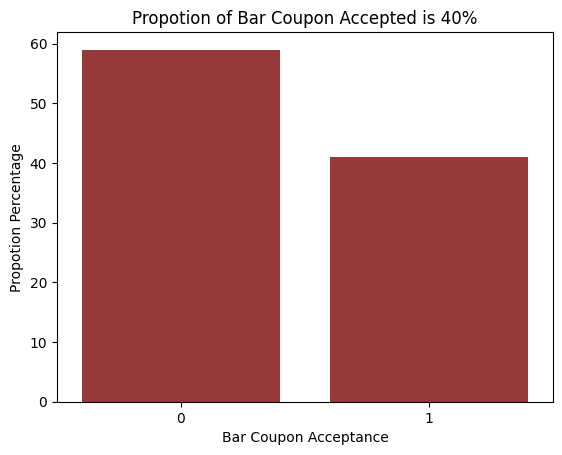

In [206]:
#Propotion of Bar Coupon Accepted
df_bar['Y'].value_counts(normalize=True)

sns.barplot( df_bar['Y'].value_counts(normalize=True)*100,  color = "brown")

# Add a title
plt.xlabel('Bar Coupon Acceptance')
plt.ylabel('Propotion Percentage')
plt.title('Propotion of Bar Coupon Accepted is 40%')

# Show the plot
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


3 or fewer times: 37.04%
More than 3 times: 76.88%


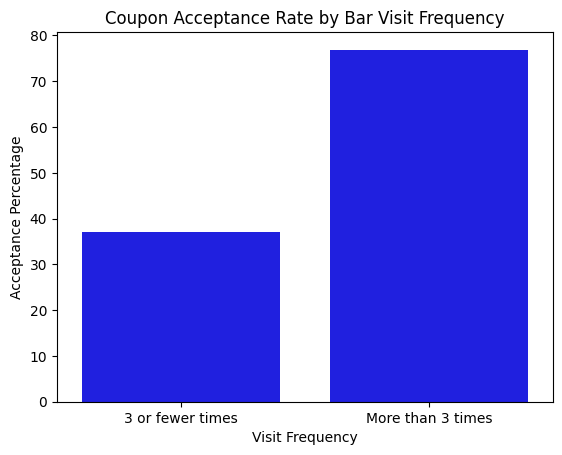

In [207]:
#get Unqiue values of Bar Column
df_bar['Bar'].unique()

# Define the groups and ignore NaN
few_times = ['never', 'less1', '1~3']
more_times = ['4~8', 'gt8']

acceptance_rate_few = df_bar.query("Bar in @few_times")["Y"].mean()*100
acceptance_rate_more = df_bar.query("Bar in @more_times")["Y"].mean()*100

print(f"3 or fewer times: {acceptance_rate_few:.2f}%")
print(f"More than 3 times: {acceptance_rate_more:.2f}%")

# Plot the bar chart
sns.barplot( x=['3 or fewer times', 'More than 3 times'],
            y=[acceptance_rate_few, acceptance_rate_more],
            color='blue')


# Add a title
plt.xlabel('Visit Frequency')
plt.ylabel('Acceptance Percentage')
plt.title('Coupon Acceptance Rate by Bar Visit Frequency')

# Show the plot
plt.show()



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


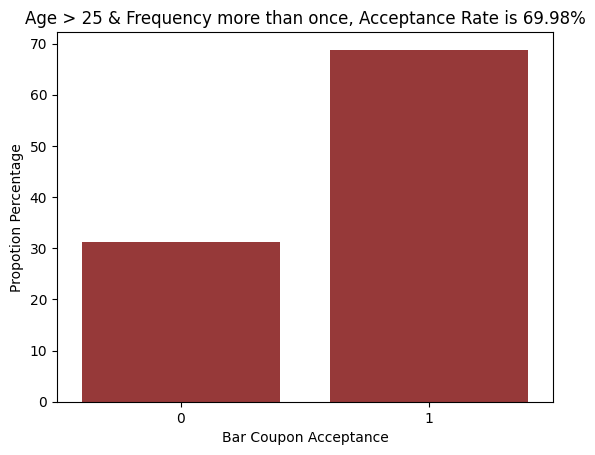

In [208]:
# Identity the type of
type(df_bar['age'])

# Convert age to integer
age_category_grt25 = ['41 to 50', '26 to 30', '31 to 40', '50 plus']

# Define the groups
more_than_once = ['1~3', '4~8', 'gt8']

#For Age > 25, and Bar values with more than once, identify the acceptance rate
sns.barplot(df_bar.query("age_category in @age_category_grt25" and "Bar in @more_than_once" )["Y"].value_counts(normalize=True)*100,  color = "brown")

# Add a title
plt.xlabel('Bar Coupon Acceptance')
plt.ylabel('Propotion Percentage')
plt.title('Age > 25 & Frequency more than once, Acceptance Rate is 69.98%')

# Show the plot
plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


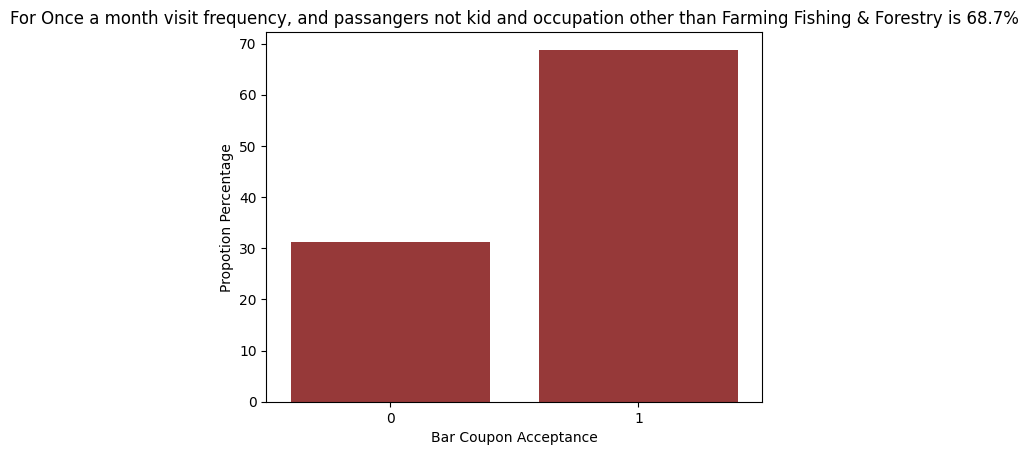

In [209]:
# Define the groups
more_than_once = ['1~3', '4~8', 'gt8']

#get Passenger Unique Values
# df_bar['passanger'].unique()
passanger_groups = ['Alone', 'Partner', 'Friend(s)']

#get Occupation Unqique Values
# df_bar['occupation'].unique()
#get occupation farming, fishing and forestry
occupation_groups = ['Farming Fishing & Forestry']

#For Once a month visit frequency, and passangers not kid and occupation other than 'Farming Fishing & Forestry'
df_bar.query("passanger in @passanger_groups" and "occupation not in @occupation_groups" and "Bar in @more_than_once")["Y"].value_counts(normalize=True)

sns.barplot(df_bar.query("passanger in @passanger_groups" and "occupation not in @occupation_groups" and "Bar in @more_than_once")["Y"].value_counts(normalize=True)*100,  color = "brown")

# Add a title
plt.xlabel('Bar Coupon Acceptance')
plt.ylabel('Propotion Percentage')
plt.title('For Once a month visit frequency, and passangers not kid and occupation other than Farming Fishing & Forestry is 68.7%')

# Show the plot
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



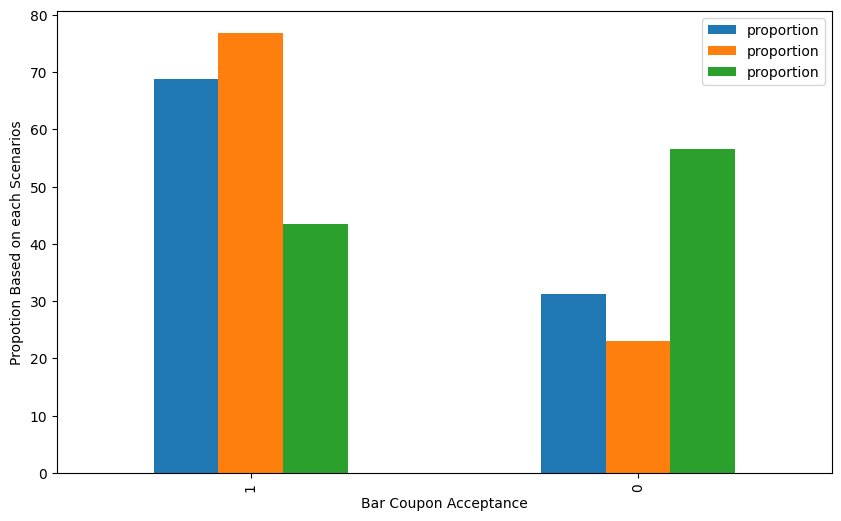

In [210]:
# Define the groups
more_than_once = ['1~3', '4~8', 'gt8']
more_than_four = ['4~8', 'gt8']

#get Passenger Unique Values and remove kids in it
passanger_groups = ['Alone', 'Partner', 'Friend(s)']

#get maritalStatus Unqiue Values and get the Widowed value
# df_bar['maritalStatus'].unique()
marital_status = ['Widowed']

#get income Unique values and get values less than 50K
# df_bar['income'].unique()
income_groups = ['$12500 - $24999','$25000 - $37499','$37500 - $49999']

#get income Unique values and get values less than 50K
# df_bar['RestaurantLessThan20'].unique()
cheap_restaurant = ['4~8', 'gt8']

# Convert age to integer
age_category_less30 = ['21 to 25', '26 to 30', 'below 21']

#go to bars more than once a month, had passengers that were not a kid, and were not widowed
df_bar_1 = df_bar.query("passanger in @passanger_groups" and "maritalStatus not in @marital_status" and "Bar in @more_than_once")["Y"]
df_bar_1 = df_bar_1.value_counts(normalize=True)*100

#go to bars more than once a month and are under the age of 30
df_bar_2 = df_bar.query("age_category in @age_category_less30" and "Bar in @more_than_four")["Y"]
df_bar_2 = df_bar_2.value_counts(normalize=True)*100

#go to cheap restaurants more than 4 times a month and income is less than 50K
df_bar_3 = df_bar.query("income in income_groups" and "Bar in @more_than_four" and "RestaurantLessThan20 in @cheap_restaurant")["Y"]
df_bar_3 = df_bar_3.value_counts(normalize=True)*100

pd.concat([df_bar_1, df_bar_2, df_bar_3], axis=1).plot(kind='bar', figsize=(10, 6))

plt.xlabel('Bar Coupon Acceptance')
plt.ylabel('Propotion Based on each Scenarios')

plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

###  People earning less than 50k use the Bar coupons more often than other categories of Salaried people and the other observation is that they are young adults and prefer saving using coupons. The coupons are more appealing to this category of folks

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [212]:
df_coffee_coupon = df[df["coupon"] == 'Coffee House']
df_coffee_coupon

df_coffee_coupon.groupby('coupon')["Y"].value_counts(normalize=True).unstack().multiply(100)

Y,0,1
coupon,,
Coffee House,50.137879,49.862121


Overall Acceptance of Coffee House Coupon is just over 50%

In [213]:
df_coffee_coupon.describe(include = 'object')

,destination,passanger,weather,time,coupon,expiration,gender,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,age_category
count,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989,37,3952,3917,3932,3939,3934,3989
unique,3,4,3,5,1,2,2,5,6,25,9,5,5,5,5,5,5,6
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,2h,Female,Single,Bachelors degree,Unemployed,$25000 - $37499,Scooter and motorcycle,never,less1,1~3,1~3,less1,31 to 40
freq,2150,2253,3461,1088,3989,2226,2048,1550,1370,570,640,10,1636,1072,1492,1679,1866,1022


###  At a high level, based on descriptive statistics and top results, individuals who are single, earn less than $50K, have a 2-hour expiration window, hold a Bachelor's degree, and are typically alone tend to frequent coffee houses more often.

<Axes: xlabel='maritalStatus'>

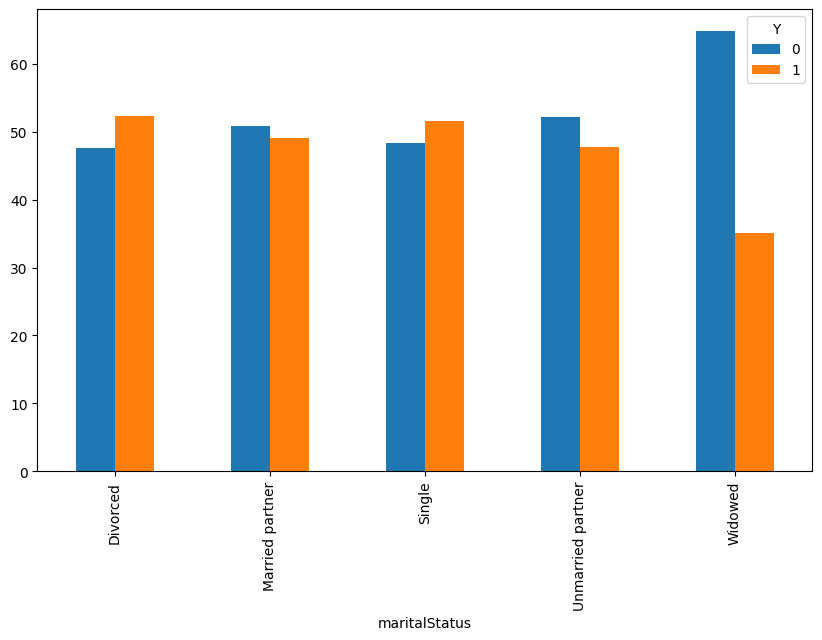

In [214]:
df_coffee_coupon.groupby('maritalStatus')["Y"].value_counts(normalize=True).unstack().multiply(100).plot(kind='bar', figsize=(10, 6))

### Coupon acceptance rates are higher among individuals who are single or divorced, and lower among those who are widowed

<Axes: xlabel='age'>

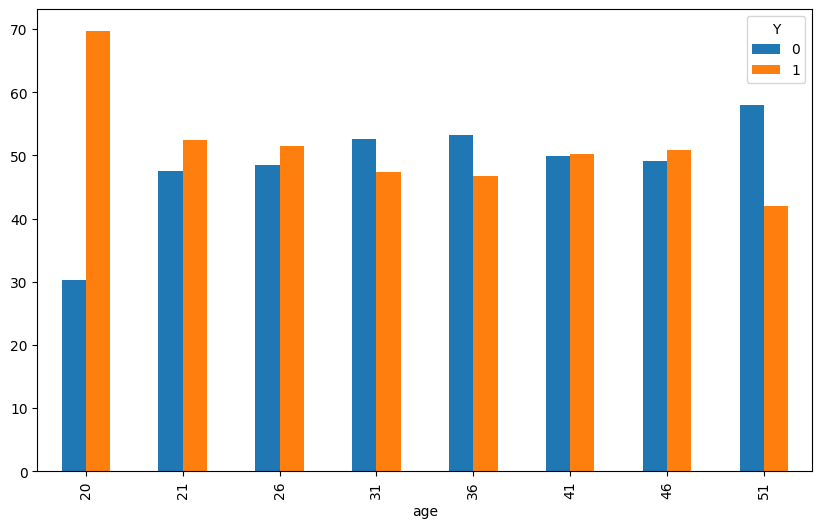

In [215]:
df_coffee_coupon.groupby('age')["Y"].value_counts(normalize=True).unstack().multiply(100).plot(kind='bar', figsize=(10, 6))

#Acceptance Rate is high when the age is below 21

<Axes: xlabel='CoffeeHouse'>

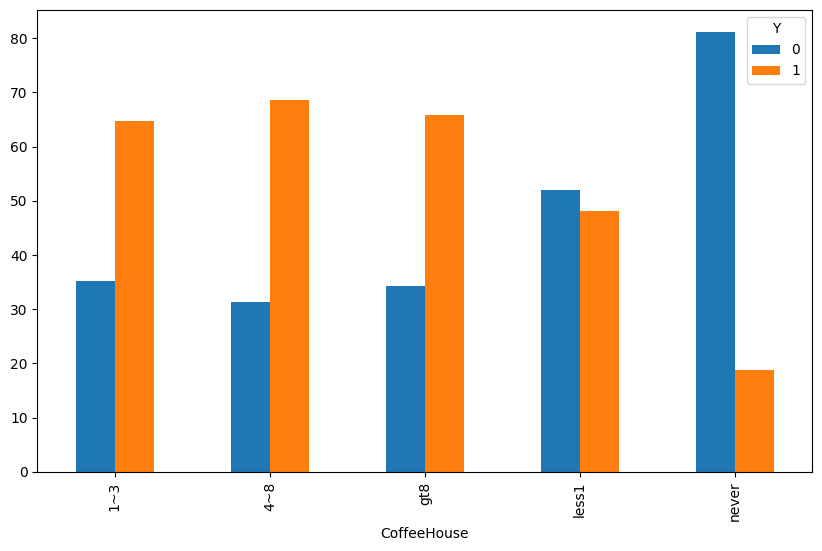

In [216]:
df_coffee_coupon.groupby('CoffeeHouse')["Y"].value_counts(normalize=True).unstack().multiply(100).plot(kind='bar', figsize=(10, 6))

### Individuals who never visit coffee houses are more likely to reject coupons, whereas the likelihood of coupon acceptance increases with the frequency of coffee house visits.